# Exploratory Data Analysis

In this notebook, we will explore the data set. We will try to understand the data better in order to be able to build a good model in the second notebook.

Outline:

* [1 Approach and Hypotheses](#approach_and_hypotheses)
* [2 Data Preparation](#data_preparation)
* [3 Exploratory Data Analysis](#eda)
    - [3.1 Analysis of Numerical Features](#numerical_features)
    - [3.2 Correlation Analysis](#correlation)
    - [3.3 Analysis of Categorical Features](#categorical_features)
    - [3.4 Hourly Distributions Grouped by Different Variables](#hourly_distributions)
* [4 Final Comments](#final_comments)

<a id = 'approach_and_hypotheses'></a>
## Approach and Hypotheses

Before starting the exploratory data analysis, let's formulate some questions and hypotheses based on the data description:

* How do casual and registered users differ in their renting behavior? Exploring this may give us some information on the effect of other variables, even though the counts of casual and registered users will be dropped in the modeling section, as they are dependent variables.
* What is the effect of environmental variables like temperature, humidity and windspeed? It seems likely that for example a higher temperature goes along with more bike rentals, while 'bad' weather (high humidity, low temperature, strong wind) is connected with lower numbers.
* How does demand change over the four seasons? This can be closely related to temperature, but there might be other effects as well.
* Which are the peak hours for bike rentals?
* On which days is demand the highest? Is there a difference between working days and weekends?

Checking these hypotheses and trying to answer some of the above questions can help us understand the data better and make a better choice for a predictive model.

Let's first do the necessary imports:

In [1]:
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# define the standard plot size
plt.rcParams["figure.figsize"] = [10, 5]

<a id = 'data_preparation'></a>
## Data Preparation

As there are already columns for year, month and weekday, and we will not run a time series analysis in this project, we are not going to use the date column as a feature. Instead we will use it as the index of the data frame:

In [3]:
# read the data and check the column types
input_file = 'data/hour.csv'
bike = pd.read_csv(input_file, index_col = "dteday", parse_dates = True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.3 MB


We notice that the data seems to be complete, i.e., there are no missing values.
It initially looks like this:

In [4]:
bike.round(2).head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.0,0,1,1


All categorical variables are encoded as integers, so we are going to change the column types.
To make plotting easier and more intuitive later on, we will also rename some of the categories. Furthermore, we delete 'instant', which is just an index:

In [5]:
bike.drop("instant", axis = 1, inplace = True)

categorical_vars = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]
for var in categorical_vars:
    bike[var] = bike[var].astype("category")
    
bike["season"] = bike["season"].cat.rename_categories({1 : "Spring", 2 : "Summer", 3 : "Fall", 4 : "Winter"})
bike["yr"] = bike["yr"].cat.rename_categories({0 : "2011", 1 : "2012"})
bike["weekday"] = bike["weekday"].cat.rename_categories({
    1 : "Monday", 2 : "Tuesday", 3 : "Wednesday", 4 : "Thursday", 5 : "Friday", 6 : "Saturday", 0 : "Sunday"
})
bike["weathersit"] = bike["weathersit"].cat.rename_categories({1 : "clear", 2 : "misty", 3 : "light_rain", 4 : "heavy_rain"})

bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.2 MB


The data now looks as follows:

In [6]:
bike.round(2).head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,Spring,2011,1,0,0,Saturday,0,clear,0.24,0.29,0.81,0.0,3,13,16
2011-01-01,Spring,2011,1,1,0,Saturday,0,clear,0.22,0.27,0.80,0.0,8,32,40
2011-01-01,Spring,2011,1,2,0,Saturday,0,clear,0.22,0.27,0.80,0.0,5,27,32
2011-01-01,Spring,2011,1,3,0,Saturday,0,clear,0.24,0.29,0.75,0.0,3,10,13
2011-01-01,Spring,2011,1,4,0,Saturday,0,clear,0.24,0.29,0.75,0.0,0,1,1


<a id = 'eda'></a>
## Exploratory Data Analysis

In this section, we will explore the data. Before going into detailed plotting, we will briefly look at the numerial as well as the categorical features in the data.

<a id = 'numerical_features'></a>
### Analysis of Numerical Features

Quick summary statistics of numerical variables for a first impression:

In [7]:
bike.describe().round(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,1.00,1.00,1.00,0.85,367.00,886.00,977.00


We can immediately see that for the three dependent variables there seem to be some very high values included.
Let's have a look at the distributions of the continuous variables:

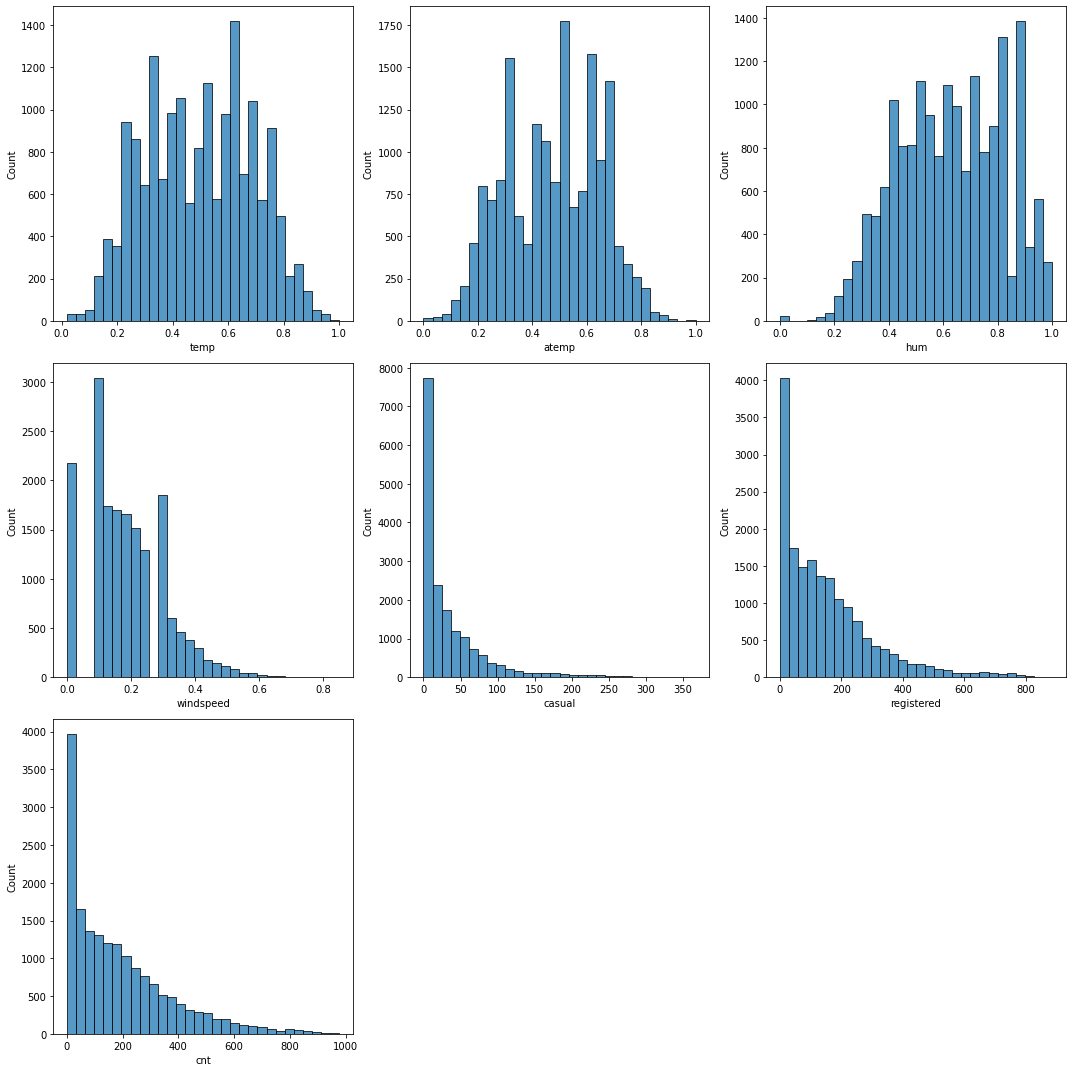

In [8]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
axes[2, 1].axis("off")
axes[2, 2].axis("off")

for var, ax in zip(bike.select_dtypes(include = np.number).columns, axes.flatten()):
    sns.histplot(bike[var], ax = ax, kde = False, bins = 30)

fig.tight_layout();

The dependent variables seem to be highly left-skewed. Let's check further by looking at some boxplots for all three user counts. To get some more detailed information, we will plot separate boxes for both the years 2011 and 2012:

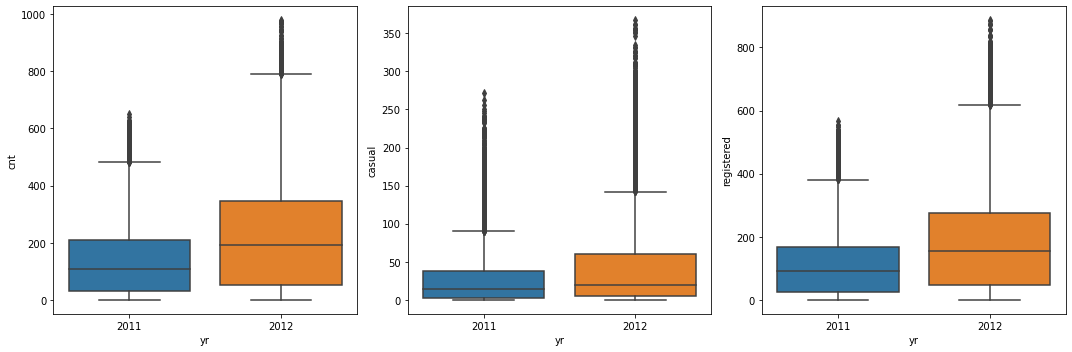

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
axes = axes.flatten()
(ax1, ax2, ax3) = (axes[0], axes[1], axes[2])

sns.boxplot(x = "yr", y = "cnt", data = bike, ax = ax1)
sns.boxplot(x = "yr", y = "casual", data = bike, ax = ax2)
sns.boxplot(x = "yr", y = "registered", data = bike, ax = ax3)

fig.tight_layout();

Findings:

* Demand seems to have increased from 2011 to 2012, possibly due to growing popularity of the service.
* The data seems to be skewed (already seen in histograms) and there are quite a few outliers.
* Therefore, it might be a good idea to transform the dependent variable(s) before making a prediction, e.g., by a log-transform.

With a log-transform, the count of total users is distributed as follows:

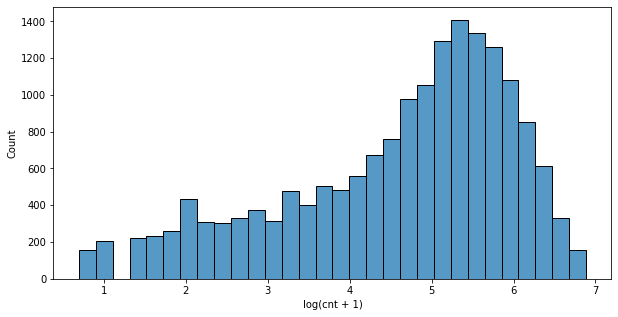

In [10]:
g = sns.histplot(np.log1p(bike["cnt"]), kde = False, bins = 30)
g.set(xlabel = "log(cnt + 1)");

Now the data look right-skewed (even though not as much as before).
We will keep in mind that a transformation might be needed, but a log-transformation is maybe not the best choice, especially as we are dealing with count data.

Next, check the total number of bike rentals in both years by season:

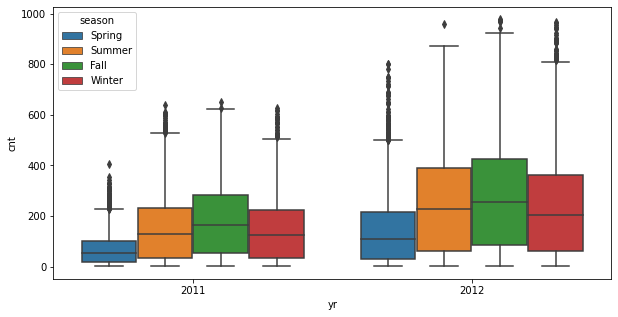

In [11]:
sns.boxplot(x = "yr", y = "cnt", data = bike, hue = "season");

Now we see that demand has been increasing in all four seasons.
It seems slightly unusual that demand is much higher in winter than in spring. This point might need some further investigation.

<a id = 'correlation'></a>
### Correlation Analysis

As a very basic tool to analyze the dependence between the numerical variables, we will check the (Pearson) correlations.
We note that this might be inefficient as we can only detect linear relationships, but the dependence structure in the data might be much more complex. However, this can be a good starting point and is easy to compute.

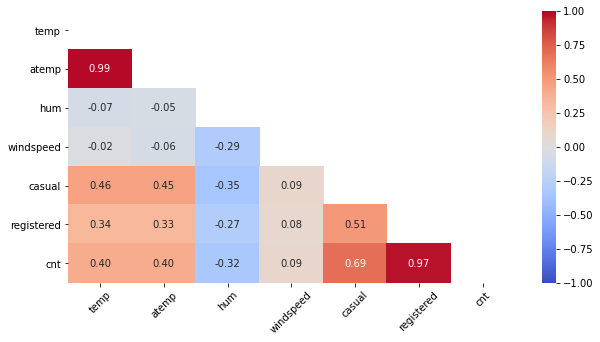

In [12]:
# Calculate correlations
corr = bike.corr()

# We only want the lower half of the matrix
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr, xticklabels = corr.columns, yticklabels = corr.columns,
    vmin = -1, vmax = 1, center = 0,
    fmt = ".2f",
    annot = True,
    mask = mask,
    cmap = "coolwarm"
)

plt.xticks(rotation = 45);

This gives us some new information and partly answers some of the initial questions:

* Positive correlation between temperature and user counts as expected; slightly stronger for casual users.
* Negative correlation between humidity and user counts as expected; slightly stronger for casual users.
* Casual users seem to be affected by the weather more strongly.
* Not a significant (linear) relationship between windspeed and user counts.
* Almost perfect linear relationship between 'temp' and 'atemp', i.e., we might drop one of them in the modeling process to avoid multicollinearity.

<a id = 'categorical_features'></a>
### Analysis of Categorical Features

Next, we will check the distributions of the categorical variables:

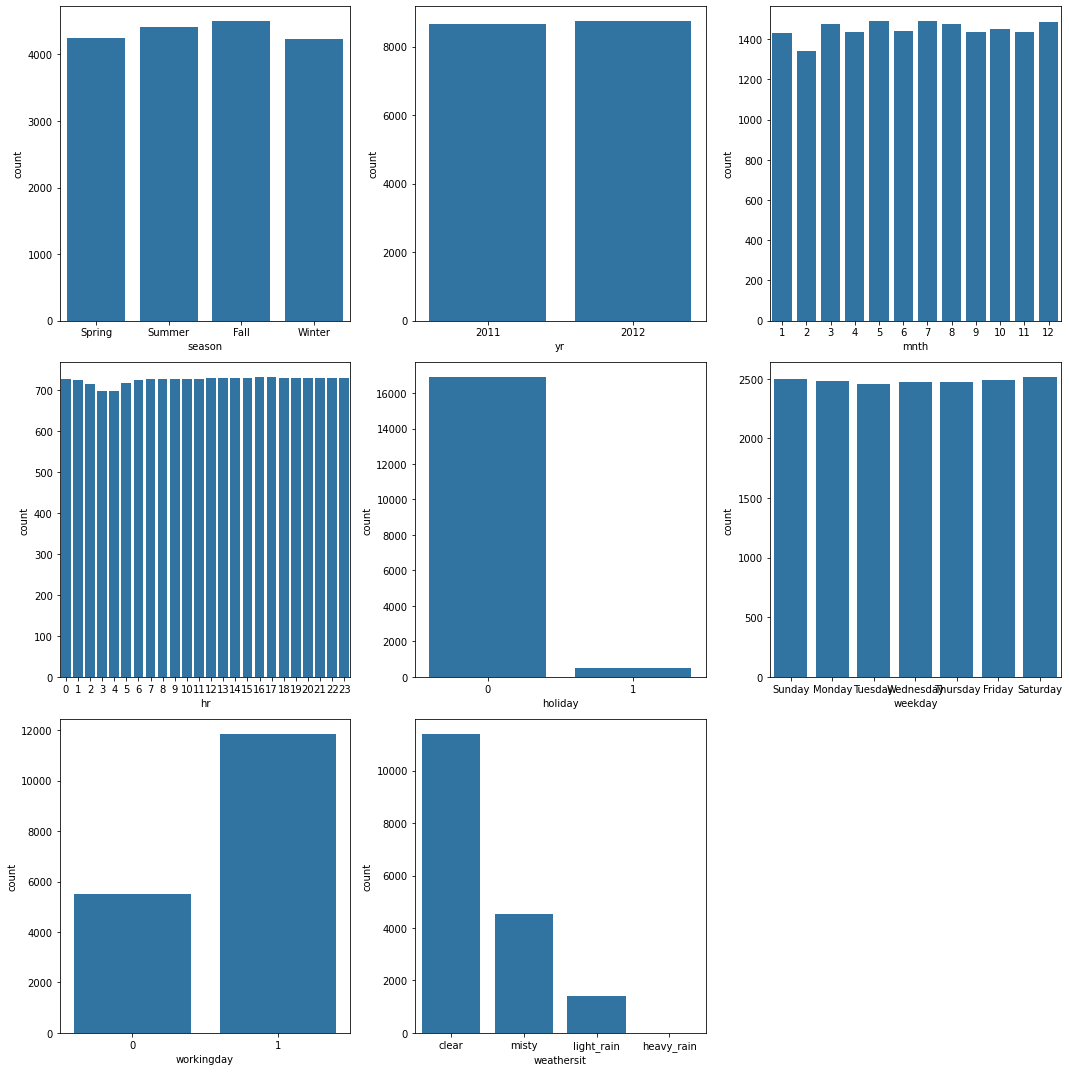

In [13]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
axes[2, 2].axis("off")

for var, ax in zip(bike.select_dtypes(include = "category").columns, axes.flatten()):
    sns.countplot(x = bike[var], ax = ax, color = sns.color_palette()[0])

fig.tight_layout();

Most of these plots are self-explanatory and basically tell us that the data is distributed as it should be (as we have two full years). The most interesting is the last plot, that tells us that there are much more days with 'clear' weather than with the other 'worse' weather conditions.

Before going into more detailed plotting, we will have a look at mean user counts grouped by some of the categorical values.
This might give us some information, which aspect to investigate more closely.

In [14]:
# Utility function to calculate mean counts grouped by a specified category.
def grouping_utility(df, value, group_by):
    return df[[group_by, value]].groupby(group_by, as_index = False).mean().round(0).sort_values(by = value, ascending = False)

We start by grouping by season and do so separately for total users, casual users and registered users:

In [15]:
grouping_utility(bike, "cnt", "season")

,season,cnt
2,Fall,236.0
1,Summer,208.0
3,Winter,199.0
0,Spring,111.0


In [16]:
grouping_utility(bike, "casual", "season")

,season,casual
2,Fall,50.0
1,Summer,46.0
3,Winter,31.0
0,Spring,14.0


In [17]:
grouping_utility(bike, "registered", "season")

,season,registered
2,Fall,186.0
3,Winter,168.0
1,Summer,162.0
0,Spring,97.0


There is a clear difference between the four seasons, even though it seems unusual that spring has less bike rentals than winter (already seen above).

Next, group by weekday to check how demand varies during the week. Again, we do so for all three user counts, to possibly detect different behavior:

In [18]:
grouping_utility(bike, "cnt", "weekday")

,weekday,cnt
4,Thursday,196.0
5,Friday,196.0
2,Tuesday,191.0
3,Wednesday,191.0
6,Saturday,190.0
1,Monday,184.0
0,Sunday,177.0


In [19]:
grouping_utility(bike, "casual", "weekday")

,weekday,casual
6,Saturday,61.0
0,Sunday,56.0
5,Friday,31.0
1,Monday,29.0
4,Thursday,25.0
2,Tuesday,24.0
3,Wednesday,23.0


In [20]:
grouping_utility(bike, "registered", "weekday")

,weekday,registered
4,Thursday,172.0
2,Tuesday,168.0
3,Wednesday,168.0
5,Friday,165.0
1,Monday,155.0
6,Saturday,129.0
0,Sunday,121.0


For the total number of users, no clear trend is visible.
However, if we look at casual and registered users separately, we see that casual users rent a bike on the weekend most often,
whereas registered users use them during the week. The latter group possibly uses them to commute to and from work.
This is an important result, as by looking only at the total counts, we might have concluded that 'weekday' is a negligible feature.

Now we look at the impact of different weather situations:

In [21]:
grouping_utility(bike, "cnt", "weathersit")

,weathersit,cnt
0,clear,205.0
1,misty,175.0
2,light_rain,112.0
3,heavy_rain,74.0


In [22]:
grouping_utility(bike, "casual", "weathersit")

,weathersit,casual
0,clear,41.0
1,misty,30.0
2,light_rain,16.0
3,heavy_rain,3.0


In [23]:
grouping_utility(bike, "registered", "weathersit")

,weathersit,registered
0,clear,164.0
1,misty,146.0
2,light_rain,96.0
3,heavy_rain,72.0


The worse the weather, the fewer users. That makes sense intuitively. However, this effect is stronger for casual users.
A possible explanation is that they are less dependent on the service than registered users.
For this analysis, however, we should keep in mind that 'clear' is by far the most frequent weather situation in the data.

<a id = 'hourly_distributions'></a>
### Hourly Distributions Grouped by Different Variables

In this section, we will plot mean user counts by hour of the day and group by different variables.
Let us begin to check how demand changes with season:

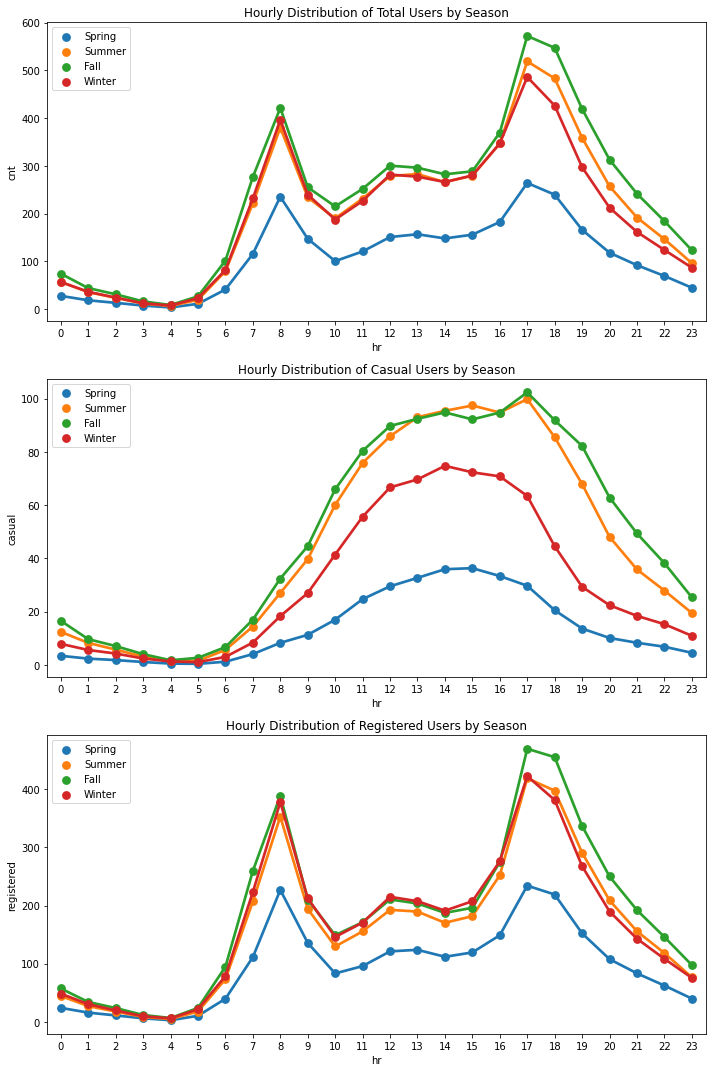

In [24]:
fig, axes = plt.subplots(3, 1, figsize = (10, 15))
axes = axes.flatten()
(ax1, ax2, ax3) = (axes[0], axes[1], axes[2])

sns.pointplot(x = "hr", y = "cnt", hue = "season", data = bike, ax = ax1, ci = None, legend = False)
ax1.legend(loc = "upper left")
ax1.set(title = "Hourly Distribution of Total Users by Season")

sns.pointplot(x = "hr", y = "casual", hue = "season", data = bike, ax = ax2, ci = None, legend = False)
ax2.legend(loc = "upper left")
ax2.set(title = "Hourly Distribution of Casual Users by Season")

sns.pointplot(x = "hr", y = "registered", hue = "season", data = bike, ax = ax3, ci = None, legend = False)
ax3.legend(loc = "upper left")
ax3.set(title = "Hourly Distribution of Registered Users by Season")

fig.tight_layout();

Findings:

* For registered users, there clearly are peak hours that are the main commuting hours (7 - 9 a.m. and 5 - 7 p.m.), i.e., many of these users probably take a bike to go to work.
* For casual users, there is only one peak, which is more evenly spread during the daytime.
* We see again, that demand in spring is lowest. (?)
* For casual users, the demand in winter is lower than in summer and fall, while for registered users these three curves are roughly the same. Again, a possible explanation is that registered users are more dependent on the bikes and therefore even use them in colder weather.

Next, we will group by working/non-working days.

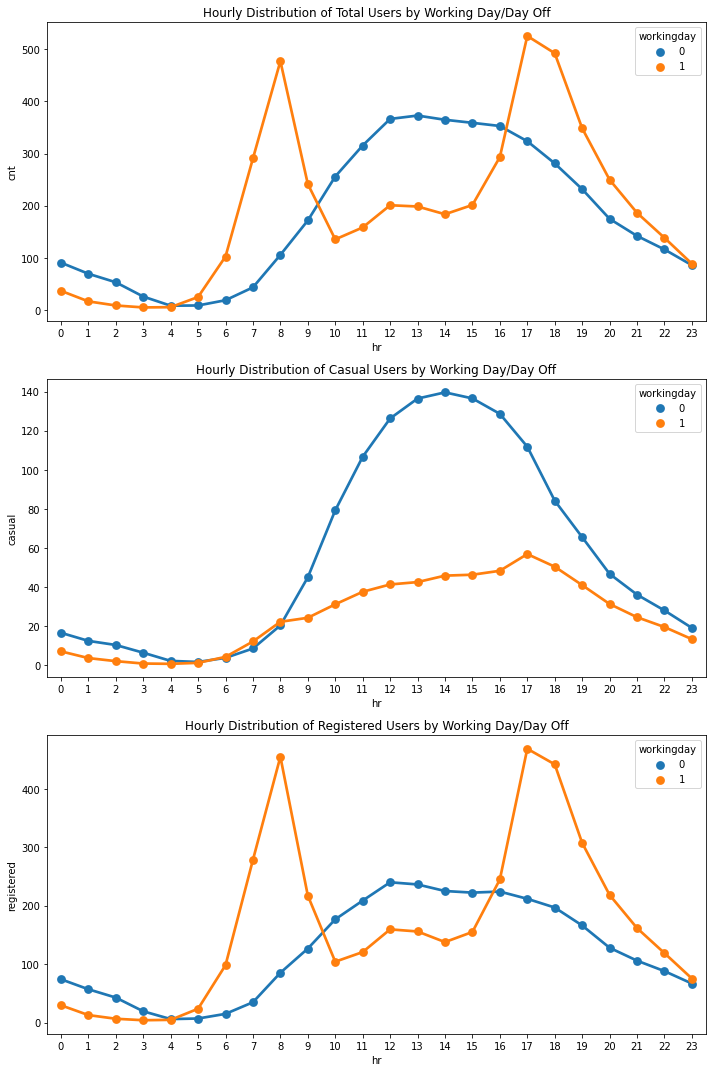

In [25]:
fig, axes = plt.subplots(3, 1, figsize = (10, 15))
axes = axes.flatten()
(ax1, ax2, ax3) = (axes[0], axes[1], axes[2])

sns.pointplot(x = "hr", y = "cnt", hue = "workingday", data = bike, ax = ax1, ci = None, legend = False)
ax1.set(title = "Hourly Distribution of Total Users by Working Day/Day Off")

sns.pointplot(x = "hr", y = "casual", hue = "workingday", data = bike, ax = ax2, ci = None, legend = False)
ax2.set(title = "Hourly Distribution of Casual Users by Working Day/Day Off")

sns.pointplot(x = "hr", y = "registered", hue = "workingday", data = bike, ax = ax3, ci = None, legend = False)
ax3.set(title = "Hourly Distribution of Registered Users by Working Day/Day Off")

fig.tight_layout();

Findings:

* For total and registered users, we see peaks at the commuting hours again on working days. This confirms our hypothesis that bikes are used to commute to and from work.
* On non working days, demand peaks more evenly during the daytime, and this effect is stronger for casual users.

We could create similar plots, grouping by all days of the week to get an even more detailed impression.
For the sake of brevity, we will stop with visualization here.

<a id = 'final_comments'></a>
## Final Comments

* It is still not clear why counts in spring are much lower than for example in winter.
* The analysis of the effect of numerical features (such as temperature) on the dependent variables was very short and deserves more attention.
* The data seems to be complete, but in a more detailed analysis one should spend more time on checking the data (outliers/erroneous values).
* As we have seen that there is a difference between casual and registered users, one could try to estimate these two counts separately (i.e., building separate models) and then adding predictions up.
* Ideas for feature engineering in the model fitting notebook:
    - Instead of using the standard one-hot-encoding, the 'hour' feature could be binned, so that we get less than 24 columns. This binning could for example be done based upon our findings in the visualization section, e.g., one bin for peak hours and so on.
    - We saw an increasing trend from 2011 to 2012. To better capture this trend, we could use 'year' and 'month' to create a new binned feature with for example quarter-yearly values such as 'Jan 2011 - Mar 2011', 'Apr 2011 - Jun 2011' ...